In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from apikey import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
#Generate Cities List

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
numofcities = len(cities)


In [3]:
#Creating a df to collect the API results in
cities_df = pd.DataFrame()
cities_df["City"] = ""
cities_df["Cloudiness"] = ""
cities_df["Country"] = ""
cities_df["Date"] = ""
cities_df["Humidity"] = ""
cities_df["Lat"] = ""
cities_df["Lng"] = ""
cities_df["Max Temp"] = ""
cities_df["Wind Speed"] = ""

In [58]:
#Perform API Calls

base_url = "http://api.openweathermap.org/data/2.5/weather?"

params = {
    "APPID" :api_key,
     "units": "imperial"
}

cities_count = 0

#The API call has a limit of 60 calls a minute, create a list from 0 to the number of cities that steps by 60 
steps = np.arange(1, numofcities, 0.5).tolist()



for city in cities:
    
    #setting the q parameter to the current city name for the API call
    params["q"] = city
    
    #keeping track of the index
    cities_count = cities_count + 1
    
    #Make API call and print out city name and number
    print(f"Processing Record {cities_count}|{city}.")
    response = requests.get(base_url, params=params).json()
    
    #Adding API response into the cities DataFrame
    try:
        
        cities_df.loc[cities_count, 'City'] = response['name']
        cities_df.loc[cities_count, 'Cloudiness'] = response['clouds']['all']
        cities_df.loc[cities_count, 'Country'] = response['sys']["country"]
        cities_df.loc[cities_count, 'Date'] = response['dt']
        cities_df.loc[cities_count, 'Humidity'] = response['main']['humidity']
        cities_df.loc[cities_count, 'Lat'] = response['coord']['lat']
        cities_df.loc[cities_count, 'Lng'] = response['coord']['lon']
        cities_df.loc[cities_count, 'Max Temp'] = response['main']['temp_max']
        cities_df.loc[cities_count, 'Wind Speed'] = response['wind']['speed']
    
    except TimeoutError:
        print("City not found... skipping.")
    except (KeyError, IndexError):
        print("City not found... skipping.")
    time.sleep(steps[cities_count]) 



Processing Record 1|nikolskoye.
Processing Record 2|ravar.
Processing Record 3|punta arenas.
Processing Record 4|capinota.
Processing Record 5|rikitea.
Processing Record 6|cayenne.
Processing Record 7|tumannyy.
City not found... skipping.
Processing Record 8|tsihombe.
City not found... skipping.
Processing Record 9|victoria.
Processing Record 10|vila velha.
Processing Record 11|charters towers.
Processing Record 12|kayerkan.
Processing Record 13|provideniya.
Processing Record 14|sao filipe.
Processing Record 15|ushuaia.
Processing Record 16|lagoa.
Processing Record 17|port alfred.
Processing Record 18|mar del plata.
Processing Record 19|san andres.
Processing Record 20|naze.
Processing Record 21|amderma.
City not found... skipping.
Processing Record 22|lianzhou.
Processing Record 23|zhaotong.
Processing Record 24|illoqqortoormiut.
City not found... skipping.
Processing Record 25|touros.
Processing Record 26|albany.
Processing Record 27|hobart.
Processing Record 28|cherskiy.
Processing 

KeyboardInterrupt: 

In [4]:
#Perform API Calls

base_url = "http://api.openweathermap.org/data/2.5/weather?"

params = {
    "APPID" :api_key,
     "units": "imperial"
}

cities_count = 0

x = 0
time_steps = np.arange(1, numofcities, 0.3).tolist()
time_track = 0

#The API call has a limit of 60 calls a minute, create a list from 0 to the number of cities that steps by 60 
steps = np.arange(0, numofcities, 25).tolist()
steps.append(numofcities-1)

for step in steps:

    while cities_count < steps[x]:
    
        #setting the q parameter to the current city name for the API call
        params["q"] = cities[cities_count]
    
        #keeping track of the index
        cities_count = cities_count + 1
        
        #Make API call and print out city name and number
        print(f"Processing Record {cities_count}|{cities[cities_count]}.")
        response = requests.get(base_url, params=params).json()

        #Adding API response into the cities DataFrame
        try:

            cities_df.loc[cities_count, 'City'] = response['name']
            cities_df.loc[cities_count, 'Cloudiness'] = response['clouds']['all']
            cities_df.loc[cities_count, 'Country'] = response['sys']["country"]
            cities_df.loc[cities_count, 'Date'] = response['dt']
            cities_df.loc[cities_count, 'Humidity'] = response['main']['humidity']
            cities_df.loc[cities_count, 'Lat'] = response['coord']['lat']
            cities_df.loc[cities_count, 'Lng'] = response['coord']['lon']
            cities_df.loc[cities_count, 'Max Temp'] = response['main']['temp_max']
            cities_df.loc[cities_count, 'Wind Speed'] = response['wind']['speed']

        except TimeoutError:
            print("City not found... skipping.")
        except (KeyError, IndexError):
            print("City not found... skipping.")
        time.sleep(time_steps[time_track])
        time_track = time_track + 1
    x = x + 1
    time_track = 0
    


Processing Record 1|atuona.
City not found... skipping.
Processing Record 2|mataura.
Processing Record 3|dunedin.
Processing Record 4|rikitea.
Processing Record 5|jamestown.
Processing Record 6|raga.
Processing Record 7|riyadh.
City not found... skipping.
Processing Record 8|dikson.
Processing Record 9|bredasdorp.
Processing Record 10|bambous virieux.
Processing Record 11|zhigansk.
Processing Record 12|elizabeth city.
Processing Record 13|cape town.
Processing Record 14|puerto ayora.
Processing Record 15|barrow.
Processing Record 16|tuatapere.
Processing Record 17|butaritari.
Processing Record 18|busselton.
Processing Record 19|teeli.
Processing Record 20|port alfred.
Processing Record 21|dolbeau.
Processing Record 22|luderitz.
City not found... skipping.
Processing Record 23|east london.
Processing Record 24|vaitape.
Processing Record 25|iqaluit.
Processing Record 26|hasaki.
Processing Record 27|hobart.
Processing Record 28|sines.
Processing Record 29|barentsburg.
Processing Record 30

Processing Record 233|dukat.
Processing Record 234|mahebourg.
Processing Record 235|kilosa.
Processing Record 236|enugu.
Processing Record 237|mount gambier.
Processing Record 238|ilulissat.
Processing Record 239|pawai.
Processing Record 240|balkanabat.
Processing Record 241|portland.
Processing Record 242|vigrestad.
Processing Record 243|muroto.
Processing Record 244|machilipatnam.
Processing Record 245|saleaula.
Processing Record 246|samusu.
City not found... skipping.
Processing Record 247|mirnyy.
City not found... skipping.
Processing Record 248|buala.
Processing Record 249|stephenville.
Processing Record 250|beloha.
Processing Record 251|grong.
Processing Record 252|mackenzie.
Processing Record 253|eureka.
Processing Record 254|kajaani.
Processing Record 255|penha.
Processing Record 256|yertsevo.
Processing Record 257|atar.
Processing Record 258|coquimbo.
Processing Record 259|aasiaat.
Processing Record 260|namatanai.
Processing Record 261|gigmoto.
Processing Record 262|salym.
Pro

Processing Record 469|vardo.
Processing Record 470|umm durman.
Processing Record 471|guadalajara.
City not found... skipping.
Processing Record 472|nhulunbuy.
Processing Record 473|pacific grove.
Processing Record 474|kleive.
Processing Record 475|bonfim.
Processing Record 476|curup.
Processing Record 477|bangui.
Processing Record 478|matara.
Processing Record 479|weiser.
Processing Record 480|palmer.
Processing Record 481|kaka.
Processing Record 482|deputatskiy.
Processing Record 483|bilibino.
Processing Record 484|awjilah.
Processing Record 485|muzhi.
Processing Record 486|moron.
Processing Record 487|cabra.
Processing Record 488|ulagan.
Processing Record 489|marsa matruh.
Processing Record 490|lazarev.
Processing Record 491|suzu.
Processing Record 492|tiznit.
City not found... skipping.
Processing Record 493|pouebo.
Processing Record 494|santa maria.
Processing Record 495|viligili.
Processing Record 496|constitucion.
City not found... skipping.
Processing Record 497|rancho palos ver

In [5]:
#Export dataframe to csv
cities_df.to_csv(output_data_file)

#Display the dataframe
cities_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
2,Atuona,2,PF,1578451518,75,-9.8,-139.03,81.27,15.08
3,Mataura,97,NZ,1578451520,66,-46.19,168.86,60.01,8.01
4,Dunedin,88,NZ,1578451521,68,-45.87,170.5,53.91,5.99
5,Rikitea,20,PF,1578451524,79,-23.12,-134.97,77.27,19.86
6,Jamestown,0,AU,1578451526,20,-33.21,138.6,88.11,6.53
...,...,...,...,...,...,...,...,...,...
598,Masindi,31,UG,1578454424,74,1.69,31.72,66.96,2.53
599,Dong Hoi,54,VN,1578454421,82,17.48,106.6,75.38,6.73
600,Hervey Bay,40,AU,1578454441,31,-25.3,152.85,91.4,10.29
601,Zharkovskiy,100,RU,1578454449,92,55.85,32.27,29.5,8.59


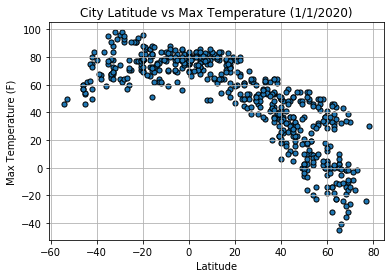

<Figure size 432x288 with 0 Axes>

In [6]:
#Plotting the Data

#Latitude vs. Temperature Plot

#Create a new df with lat and max temp as the type integers
lat_maxtemp = cities_df[["Lat", "Max Temp"]].astype(int)

#Plot a scatterplot with x as latitute and y as max temperature
lat_maxtemp_plot = lat_maxtemp.plot(kind="scatter", x = "Lat", y = "Max Temp", s=26, edgecolors='black')

#Adding chart title, axis labels, and grid lines
plt.title("City Latitude vs Max Temperature (1/1/2020)")

lat_maxtemp_plot.set_xlabel("Latitude")
lat_maxtemp_plot.set_ylabel("Max Temperature (F)")  

lat_maxtemp_plot.grid()

plt.savefig("maxtemp.png")
plt.show()
plt.tight_layout()

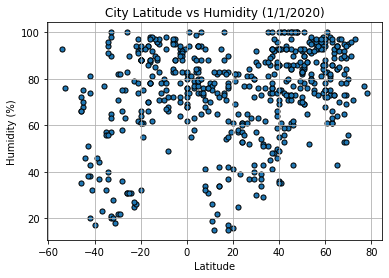

<Figure size 432x288 with 0 Axes>

In [7]:
#Plotting the Data

#Latitude vs. Humidity Plot

#Create a new df with lat and humidity as the type integers
lat_humidity = cities_df[["Lat", "Humidity"]].astype(int)

#Plot a scatterplot with x as latitute and y as humidity
lat_hum_plot = lat_humidity.plot(kind="scatter", x = "Lat", y = "Humidity", s=26, edgecolors='black')

#Adding chart title, axis labels, and grid lines
plt.title("City Latitude vs Humidity (1/1/2020)")

lat_hum_plot.set_xlabel("Latitude")
lat_hum_plot.set_ylabel("Humidity (%)")  

lat_hum_plot.grid()

plt.savefig("humidity.png")
plt.show()
plt.tight_layout()

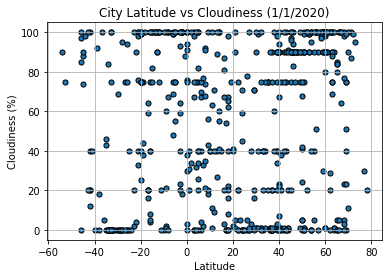

<Figure size 432x288 with 0 Axes>

In [8]:
#Plotting the Data

#Latitude vs. Cloudiness Plot

#Create a new df with lat and cloudiness as the type integers
lat_cloud = cities_df[["Lat", "Cloudiness"]].astype(int)

#Plot a scatterplot with x as latitute and y as cloudiness
lat_cloud_plot = lat_cloud.plot(kind="scatter", x = "Lat", y = "Cloudiness", s=26, edgecolors='black')

#Adding chart title, axis labels, and grid lines
plt.title("City Latitude vs Cloudiness (1/1/2020)")

lat_cloud_plot.set_xlabel("Latitude")
lat_cloud_plot.set_ylabel("Cloudiness (%)")  

lat_cloud_plot.grid()

plt.savefig("cloudiness.png")
plt.show()
plt.tight_layout()

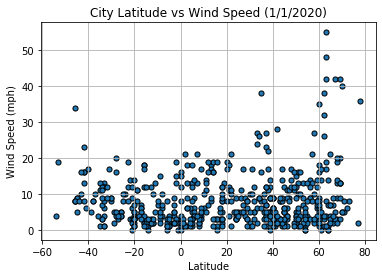

<Figure size 432x288 with 0 Axes>

In [9]:
#Plotting the Data

#Latitude vs. Wind Speed Plot

#Create a new df with lat and humidity as the type integers
lat_wind = cities_df[["Lat", "Wind Speed"]].astype(int)

#Plot a scatterplot with x as latitute and y as humidity
lat_wind_plot = lat_wind.plot(kind="scatter", x = "Lat", y = "Wind Speed", s=26, edgecolors='black')

#Adding chart title, axis labels, and grid lines
plt.title("City Latitude vs Wind Speed (1/1/2020)")

lat_wind_plot.set_xlabel("Latitude")
lat_wind_plot.set_ylabel("Wind Speed (mph)")  

lat_wind_plot.grid()

plt.savefig("wind.png")
plt.show()
plt.tight_layout()